In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [280]:
df= pd.read_csv('movies_DA.csv')
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [239]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [240]:
movies = df.copy()

## Column descriptions

budget: the budget of a movie. Some movies don't have this, so it appears as 0

company: the production company

country: country of origin

director: the director

genre: main genre of the movie.

gross: revenue of the movie

name: name of the movie

rating: rating of the movie (R, PG, etc.)

released: release date (YYYY-MM-DD)

runtime: duration of the movie

score: IMDb user rating

votes: number of user votes

star: main actor/actress

writer: writer of the movie

year: year of release

In [241]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [242]:
for col in movies.columns:
    pct_missing_values = np.round(np.mean(movies[col].isnull()),5)
    print('{} - {}%'.format(col, pct_missing_values))

name - 0.0%
rating - 0.01004%
genre - 0.0%
year - 0.0%
released - 0.00026%
score - 0.00039%
votes - 0.00039%
director - 0.0%
writer - 0.00039%
star - 0.00013%
country - 0.00039%
budget - 0.28312%
gross - 0.02465%
company - 0.00222%
runtime - 0.00052%


In [243]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [244]:
movies.budget = movies.budget.fillna(movies.budget.mean())

In [245]:
movies.budget.isnull().sum()

0

In [246]:
movies.budget = movies.budget.astype('int64')

In [247]:
movies.gross = movies.gross.fillna(movies.gross.mean())

In [248]:
movies.gross = movies.gross.fillna(movies.gross.mean())

In [249]:
movies.gross = movies.gross.astype('int64')

In [250]:
movies.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [251]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [252]:
movies = movies.drop('released', axis = 1)

In [253]:
movies.columns


Index(['name', 'rating', 'genre', 'year', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

In [254]:
movies.rename(columns={'year':'yearcorrect'}, inplace = True)

In [279]:
movies.head(10)

,name,rating,genre,yearcorrect,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0
5,2109,6,10,1980,6.4,123000.0,2528,4362,241,55,550000,39754601,1812,95.0
6,5574,6,0,1980,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0
7,4436,6,3,1980,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0
8,5281,4,0,1980,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0
9,6213,6,3,1980,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0


In [256]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7668 non-null   object 
 1   rating       7591 non-null   object 
 2   genre        7668 non-null   object 
 3   yearcorrect  7668 non-null   int64  
 4   score        7665 non-null   float64
 5   votes        7665 non-null   float64
 6   director     7668 non-null   object 
 7   writer       7665 non-null   object 
 8   star         7667 non-null   object 
 9   country      7665 non-null   object 
 10  budget       7668 non-null   int64  
 11  gross        7668 non-null   int64  
 12  company      7651 non-null   object 
 13  runtime      7664 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 838.8+ KB


In [277]:
pd.set_option('display.max_rows',None)
movies.sort_values(by=['gross'], inplace = False, ascending = False).head()

,name,rating,genre,yearcorrect,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


In [258]:

if movies.duplicated().any():
    print("Duplicate rows exist.")
else:
    print("No duplicate rows.")


No duplicate rows.


In [259]:
movies[movies.duplicated()].sum()

name           0.0
rating         0.0
genre          0.0
yearcorrect    0.0
score          0.0
votes          0.0
director       0.0
writer         0.0
star           0.0
country        0.0
budget         0.0
gross          0.0
company        0.0
runtime        0.0
dtype: float64

In [260]:
movies.drop_duplicates(inplace=True)

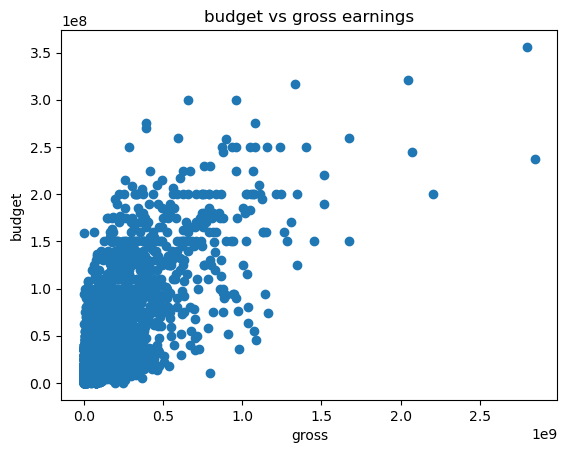

In [261]:
plt.scatter(x=movies['gross'],y = movies['budget'])
plt.title('budget vs gross earnings')
plt.xlabel('gross')
plt.ylabel('budget')
plt.show()

In [276]:
movies.sort_values(by= 'gross', ascending = False, inplace= False).head()

,name,rating,genre,yearcorrect,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


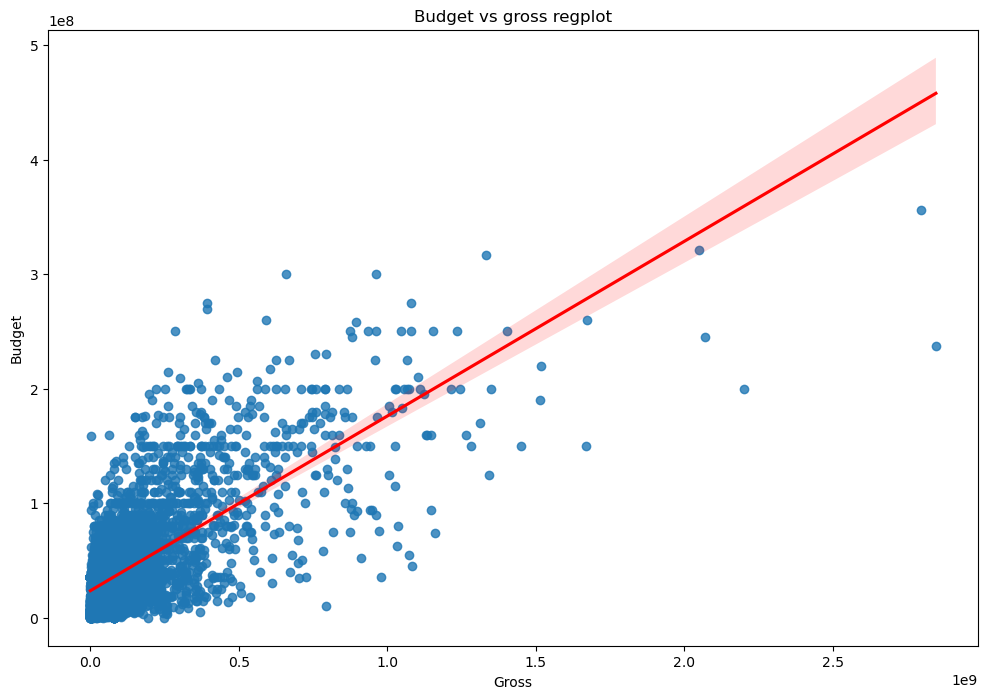

In [263]:
 # budget vs gross REGPLOT
plt.figure(figsize = (12,8))
sns.regplot(x = 'gross', y = 'budget', data = movies, line_kws = {'color':'red'})
plt.title('Budget vs gross regplot')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()


In [264]:
# correleation

movies.corr()

C:\Users\patta\AppData\Local\Temp\ipykernel_3424\1068227911.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr()


,yearcorrect,score,votes,budget,gross,runtime
yearcorrect,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


In [265]:
# budget and gross are having high correlation

C:\Users\patta\AppData\Local\Temp\ipykernel_3424\2274150176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movies.corr()


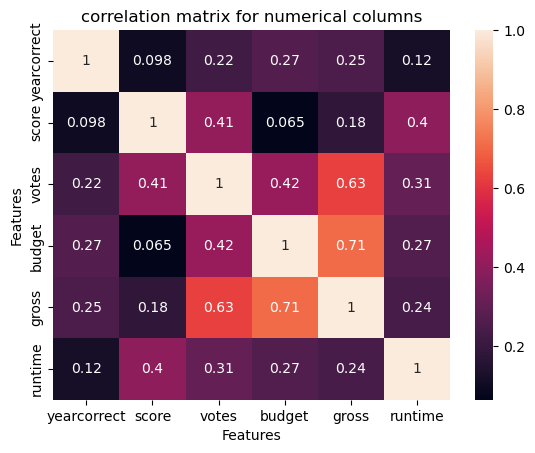

In [266]:
corr_matrix = movies.corr()

sns.heatmap(corr_matrix,annot = True);
plt.title('correlation matrix for numerical columns')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [275]:
# turning the object type cols to check their correlation also.

numerized_df = movies

for col_name in numerized_df.columns:
    if numerized_df[col_name].dtype == 'object':
        numerized_df[col_name]= numerized_df[col_name].astype('category')
        numerized_df[col_name]= numerized_df[col_name].cat.codes
        
numerized_df.head()

,name,rating,genre,yearcorrect,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


In [268]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [269]:
numerized_df.corr()

,name,rating,genre,yearcorrect,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711
yearcorrect,0.011453,0.008779,-0.081261,1.000000,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120811
score,0.017097,-0.001314,0.027965,0.097995,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174
country,-0.010737,0.081244,-0.037615,-0.070938,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.039000,0.089949,0.095548,-0.078412


In [270]:
numerized_df['country'].value_counts()

 55    5475
 54     816
 14     279
 6      190
 15     117
 2       92
 27      81
 20      62
 25      61
 47      47
 17      45
 23      43
 8       40
 45      35
 11      32
 48      25
 34      25
 32      22
 33      12
 35      12
 57      12
 49      10
 22      10
 44       8
 10       8
 4        8
 42       8
 0        8
 50       7
 18       6
 51       6
 5        6
 58       5
 3        5
 24       5
 38       4
 52       3
-1        3
 13       3
 37       3
 21       2
 53       2
 19       2
 46       2
 7        2
 16       2
 12       2
 56       2
 39       2
 36       1
 31       1
 28       1
 1        1
 43       1
 41       1
 9        1
 30       1
 26       1
 40       1
 29       1
Name: country, dtype: int64

Text(120.72222222222221, 0.5, 'all features')

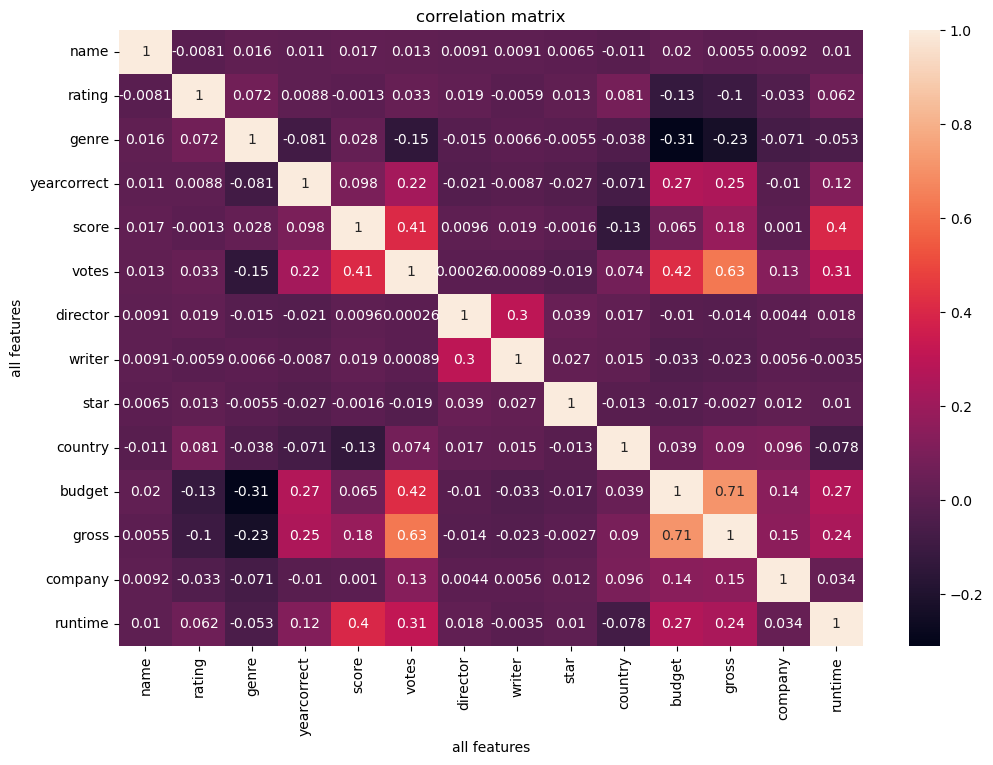

In [271]:
corr = numerized_df.corr(method = 'pearson')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.title('correlation matrix')
plt.xlabel('all features')
plt.ylabel('all features')

In [272]:
# takuing a good look at the correlation by unstacking it

corr_mat = numerized_df.corr(method = 'pearson')

corr_pairs = corr_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             yearcorrect    0.011453
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020368
             gross          0.005466
             company        0.009211
             runtime        0.010392
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             yearcorrect    0.008779
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
             budget        -0.126046
             gross         -0.102116
             company       -0.032943
 

In [273]:
sorted_corr = corr_pairs.sort_values()

sorted_corr

genre        budget        -0.310566
budget       genre         -0.310566
gross        genre         -0.230267
genre        gross         -0.230267
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
budget       rating        -0.126046
rating       budget        -0.126046
gross        rating        -0.102116
rating       gross         -0.102116
yearcorrect  genre         -0.081261
genre        yearcorrect   -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
genre        company       -0.071067
company      genre         -0.071067
yearcorrect  country       -0.070938
country      yearcorrect   -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
country      genre         -0.037615
genre        country       -0.037615
budget       writer        -0.033216
writer       budget        -0.033216
rating       company       -0.032943
c

So these are the sorted correlation pairs here we can check all the higher correlations in an easy way.

In [274]:
high_correlation = sorted_corr[(sorted_corr)>0.4]
high_correlation

score        votes          0.409182
votes        score          0.409182
budget       votes          0.421090
votes        budget         0.421090
gross        votes          0.628713
votes        gross          0.628713
budget       gross          0.711270
gross        budget         0.711270
name         name           1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
yearcorrect  yearcorrect    1.000000
genre        genre          1.000000
rating       rating         1.000000
company      company        1.000000
runtime      runtime        1.000000
dtype: float64

### So after all this analysis we can tell that budget and gross have the higher correlation. So that means if our movie production budget is more then the chances of making more revenue out of the movie is 71%.